# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = ["imperial"]

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

test = requests.get(query_url + 'saskylakh').json()
test

{'coord': {'lon': 114.0833, 'lat': 71.9167},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 267.44,
  'feels_like': 267.44,
  'temp_min': 267.44,
  'temp_max': 267.44,
  'pressure': 999,
  'humidity': 98,
  'sea_level': 999,
  'grnd_level': 998},
 'visibility': 1090,
 'wind': {'speed': 0.45, 'deg': 325, 'gust': 0.66},
 'clouds': {'all': 100},
 'dt': 1634599107,
 'sys': {'country': 'RU', 'sunrise': 1634601936, 'sunset': 1634631084},
 'timezone': 32400,
 'id': 2017155,
 'name': 'Saskylakh',
 'cod': 200}

In [9]:
# set up lists to hold reponse info
latitude = []
longitude = []
temp = []
humidity = []
cloudiness = []
windspeed = []
city_name = []
country = []

print(f'Beginning Data Retrieval')
print(f'------------------------')

# Loop through the list of cities and perform a request for data on each
for city in cities:
    
    try:
        time.sleep(1)
        response = requests.get(query_url + city).json()
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        city_name.append(response['name'])
        country.append(response['sys']['country'])
        print(f'Loaded data for city: {city}')
        
    except: 
        print(f'City not found: {city}')
        pass


Beginning Data Retrieval
------------------------
Loaded data for city: jumla
City not found: palabuhanratu
Loaded data for city: hobart
Loaded data for city: bowen
Loaded data for city: albany
Loaded data for city: pacifica
Loaded data for city: puerto ayora
City not found: illoqqortoormiut
City not found: sumbawa
Loaded data for city: severo-kurilsk
Loaded data for city: saint-gilles
Loaded data for city: barrow
Loaded data for city: laguna
Loaded data for city: ushuaia
Loaded data for city: polunochnoye
Loaded data for city: mao
Loaded data for city: qaanaaq
Loaded data for city: portobelo
Loaded data for city: simpang
Loaded data for city: lokosovo
Loaded data for city: port hardy
Loaded data for city: usinsk
Loaded data for city: gazalkent
Loaded data for city: dunmore east
Loaded data for city: hithadhoo
Loaded data for city: talnakh
Loaded data for city: lorengau
Loaded data for city: busselton
Loaded data for city: rikitea
Loaded data for city: kapaa
Loaded data for city: georg

Loaded data for city: aksu
Loaded data for city: son la
Loaded data for city: motygino
Loaded data for city: salalah
Loaded data for city: san cristobal
Loaded data for city: vila velha
Loaded data for city: aranos
Loaded data for city: iqaluit
Loaded data for city: zabid
Loaded data for city: vao
Loaded data for city: aykhal
Loaded data for city: east london
Loaded data for city: san fernando
Loaded data for city: rio gallegos
Loaded data for city: tahe
Loaded data for city: ilulissat
Loaded data for city: rincon
Loaded data for city: moa
Loaded data for city: nuqui
City not found: dolbeau
Loaded data for city: manokwari
Loaded data for city: saint george
Loaded data for city: cedar city
Loaded data for city: winnemucca
Loaded data for city: saint-augustin
Loaded data for city: gisborne
Loaded data for city: thaba-tseka
Loaded data for city: sao miguel do araguaia
Loaded data for city: sorong
Loaded data for city: adzhamka
Loaded data for city: beatrice
Loaded data for city: bridlingt

Loaded data for city: alta floresta
Loaded data for city: yumen
Loaded data for city: kongolo
Loaded data for city: ures
Loaded data for city: marzuq
Loaded data for city: matagami
Loaded data for city: nioaque
Loaded data for city: kiunga
Loaded data for city: takoradi
Loaded data for city: vinnytsya
Loaded data for city: southbridge
Loaded data for city: leh
Loaded data for city: virginia beach
Loaded data for city: erzurum
Loaded data for city: comodoro rivadavia
Loaded data for city: gamba
Loaded data for city: bubaque
Loaded data for city: thunder bay
Loaded data for city: chivay
Loaded data for city: jaisalmer
Loaded data for city: senno
Loaded data for city: biltine
Loaded data for city: ossora
Loaded data for city: gat
Loaded data for city: turukhansk
Loaded data for city: el alto
Loaded data for city: ayacucho
Loaded data for city: neiafu
Loaded data for city: seydi
City not found: mullaitivu
Loaded data for city: nalut
City not found: samusu
Loaded data for city: znamenskoye


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
weather_dict = {
    "City": city_name,
    "Latitude": latitude,
    "Longitude": longitude,
    "Temperature": temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Windspeed": windspeed,
    "Country": country
}

weather_data = pd.DataFrame(weather_dict)
weather_data


,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Windspeed,Country
0,Jumla,29.2747,82.1838,286.03,99,100,1.64,NP
1,Hobart,-42.8794,147.3294,283.08,63,75,0.45,AU
2,Bowen,-20.0167,148.2333,300.15,74,8,5.07,AU
3,Albany,42.6001,-73.9662,280.23,77,50,0.89,US
4,Pacifica,37.6138,-122.4869,288.79,72,40,1.79,US
...,...,...,...,...,...,...,...,...
572,Sangar,63.9242,127.4739,261.41,83,97,3.07,RU
573,Perevolotskiy,51.8763,54.1938,283.06,73,100,6.10,RU
574,Cayenne,4.9333,-52.3333,300.42,82,75,1.03,GF
575,Dudinka,69.4058,86.1778,273.97,93,100,7.18,RU


In [11]:
weather_data.to_csv('Weather_Data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [24]:
#  Get the indices of cities that have humidity over 100%.
high_humid = weather_data.loc[weather_data['Humidity'] > 100, :]
high_humid

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Windspeed


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# no cities with humidity over 100

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'Temperature v Latitude')

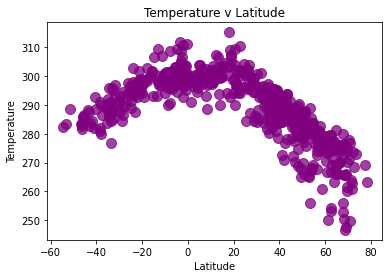

In [25]:
latitude = weather_data["Latitude"]
temp = weather_data["Temperature"]

plt.scatter(latitude, temp, marker = "o", facecolor="purple", s=100, alpha=.75)
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Temperature v Latitude")


## Latitude vs. Humidity Plot

Text(0.5, 1.0, 'Humidity v Latitude')

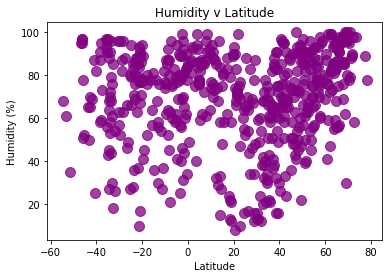

In [26]:
humid = weather_data["Humidity"]

plt.scatter(latitude, humid, marker = "o", facecolor="purple", s=100, alpha=.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity v Latitude")

## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'Cloudiness v Latitude')

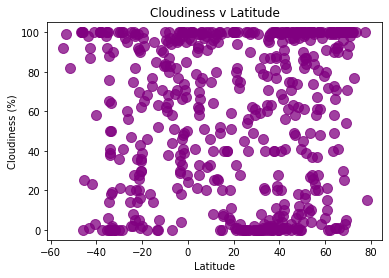

In [28]:
cloud = weather_data["Cloudiness"]

#scatter plot for cloudiness
plt.scatter(latitude, cloud, marker = "o", facecolor="purple", s=100, alpha=.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness v Latitude")

## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'Wind Speed Latitude')

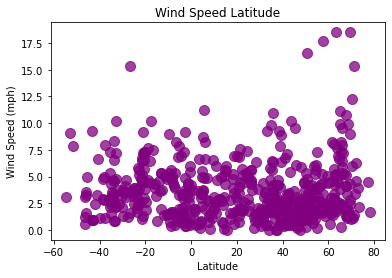

In [29]:
wind_speed = weather_data["Windspeed"]

#scatter plot for wind speed
plt.scatter(latitude, wind_speed, marker = "o", facecolor="purple", s=100, alpha=.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Wind Speed Latitude")

## Linear Regression

In [31]:
north = weather_data.loc[weather_data['Latitude'] >= 0.00]
north_lat = north["Latitude"]

south = weather_data.loc[weather_data['Latitude'] <= 0.00]
south_lat = south["Latitude"]

north

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Windspeed
5,Sharkan,57.2989,53.8712,281.02,75,100,4.26
6,Tiksi,71.6872,128.8694,260.81,90,100,3.33
8,Shingū,33.7333,135.9833,285.00,78,40,2.77
9,Chokurdakh,70.6333,147.9167,249.65,100,98,1.16
12,Butaritari,3.0707,172.7902,300.27,75,41,3.68
...,...,...,...,...,...,...,...
547,Maniwaki,46.3834,-75.9660,282.67,77,96,3.08
548,Duncan,34.5023,-97.9578,293.96,34,1,4.63
549,Puri,19.8000,85.8500,298.44,89,100,3.08
550,Duxbury,42.0418,-70.6723,290.18,61,1,1.34


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(0.5, 1.0, 'Northern Hemisphere Temperature v Latitude')

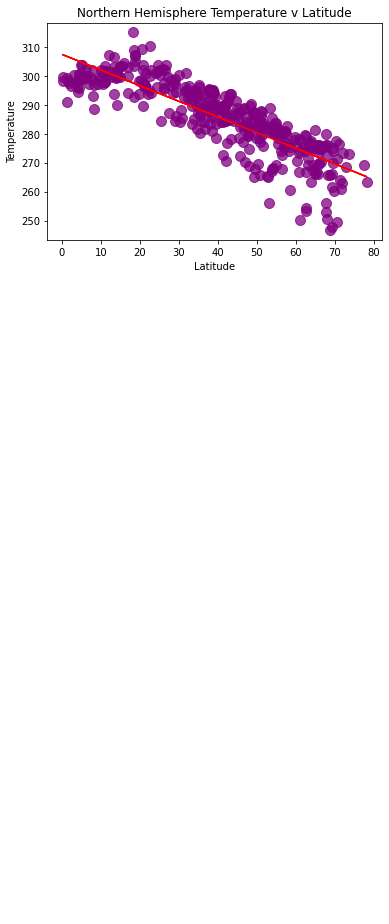

In [32]:
north_temp = north["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_temp)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.scatter(north_lat, north_temp, marker = "o", facecolor="purple", s=100, alpha=.75)
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Northern Hemisphere Temperature v Latitude")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(0.5, 1.0, 'Southern Hemisphere Temperature v Latitude')

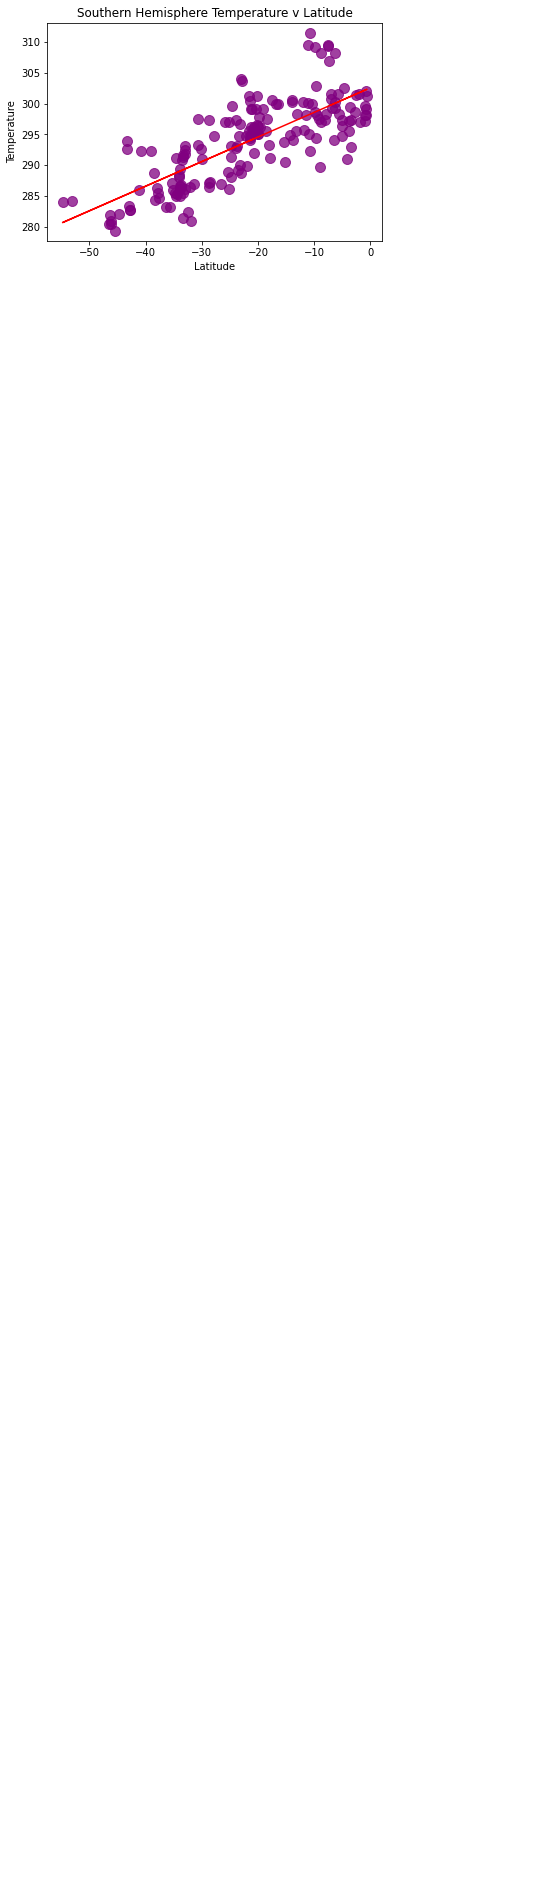

In [15]:
south_temp = south["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_temp)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
             
plt.scatter(south_lat, south_temp, marker = "o", facecolor="purple", s=100, alpha=.75)
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Southern Hemisphere Temperature v Latitude")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(0.5, 1.0, 'Northern Hemisphere Humidity v Latitude')

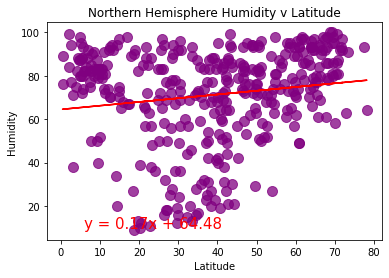

In [16]:
north_humid = north["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_humid)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.scatter(north_lat, north_humid, marker = "o", facecolor="purple", s=100, alpha=.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere Humidity v Latitude")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(0.5, 1.0, 'Southern Hemisphere Humidity v Latitude')

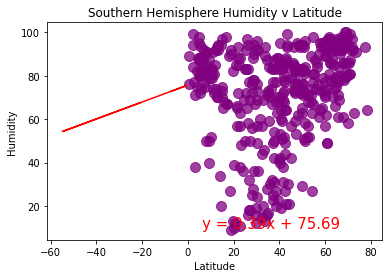

In [17]:
south_humid = south["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_humid)
regress_values =  south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.scatter(north_lat, north_humid, marker = "o", facecolor="purple", s=100, alpha=.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere Humidity v Latitude")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(0.5, 1.0, 'Northern Hemisphere Cloudiness v Latitude')

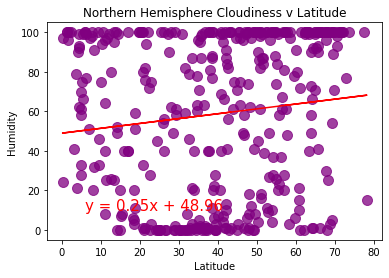

In [33]:
north_clouds = north["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_clouds)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.scatter(north_lat, north_clouds, marker = "o", facecolor="purple", s=100, alpha=.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere Cloudiness v Latitude")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(0.5, 1.0, 'Southern Hemisphere Cloudiness v Latitude')

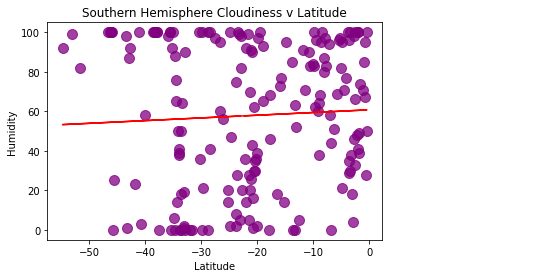

In [34]:
south_clouds = south["Cloudiness"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_clouds)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.scatter(south_lat, south_clouds, marker = "o", facecolor="purple", s=100, alpha=.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere Cloudiness v Latitude")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(0.5, 1.0, 'Northern Hemisphere Windspeed v Latitude')

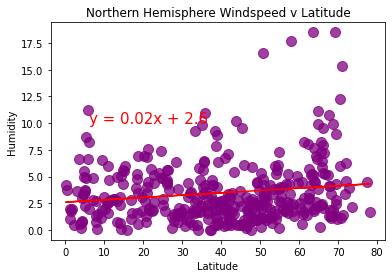

In [35]:
north_wind = north["Windspeed"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_wind)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.scatter(north_lat, north_wind, marker = "o", facecolor="purple", s=100, alpha=.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere Windspeed v Latitude")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(0.5, 1.0, 'Southern Hemisphere Windspeed v Latitude')

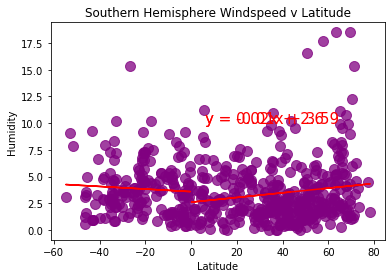

In [36]:
south_wind = south["Windspeed"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_wind)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.scatter(north_lat, north_wind, marker = "o", facecolor="purple", s=100, alpha=.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere Windspeed v Latitude")


(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_wind)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.scatter(south_lat, south_wind, marker = "o", facecolor="purple", s=100, alpha=.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere Windspeed v Latitude")